In [1]:
%matplotlib widget

# conda install pythreejs

# Documentation: https://github.com/cihologramas/pyoptools/blob/master/Tutorial/Tutorial.ipynb

import math
from pyoptools.all import *

In [2]:
n_glass=1.5168 # BK7 glass


mobile_mirr = RoundMirror(radius= 25.4, thickness = 0.06, reflectivity = 0.99)

BS = BeamSplittingCube(size= 25.4, reflectivity=0.5,  material=material.lzos["BK8"])

l_rad = 25.4
L=IdealTLens(shape=Circular(radius=l_rad), f=100, d=3)
#L1 = SphericalLens(radius=25.4, curvature_s1=470, curvature_s2=470, thickness=3, material=material.lzos["BK8"])


#S1=Spherical(curvature=1/100., shape=Circular(radius=20.))
#S2=Spherical(curvature=1/200., shape=Circular(radius=20.))

#S3=Cylinder(radius=20,length=6.997)

In [3]:
#L1=Component(surflist=[(S1, (0, 0, -5), (0, 0, 0)), (S2, (0, 0, 5), (0, math.pi, 0)), (S3,(0,0,.509),(0,0,0))], material=material.schott["BK7"])

In [4]:
ccd_tran=CCD(size=(10,10), transparent=False)

ccd_refl=CCD(size=(10,10), transparent=False)


In [5]:
laser_mirror_d = 200
mirror_bs_d = 60
bs_trans_ccd_d = 100
bs_lens_d = 40
lens_refl_ccd_d = 100

S=System(complist=[(mobile_mirr, (0, 0, laser_mirror_d), (0, math.radians(45), 0)),
                   (BS, (-mirror_bs_d, 0, laser_mirror_d), (0, 0, 0)),
                   (ccd_tran, (-mirror_bs_d-bs_trans_ccd_d, 0, laser_mirror_d), (0, math.radians(90), 0)),
                   (L, (-mirror_bs_d, 0, laser_mirror_d+bs_lens_d), (0, 0, 0)),
                   (ccd_refl, (-mirror_bs_d, 0, laser_mirror_d+bs_lens_d+lens_refl_ccd_d), (0, 0, 0))], n=1)

In [6]:
r_color = 'violet'
R=[Ray((0, 0, 0), (0, 0, 1), draw_color=r_color), Ray((10, 0, 0), (0, 0, 1), draw_color=r_color), Ray((-10, 0, 0), (0, 0, 1), draw_color=r_color),Ray((0, 10, 0), (0, 0, 1), draw_color=r_color), Ray((0, -10, 0), (0, 0, 1), draw_color=r_color),]
#R=[Ray((0, 0, 0), (0, 0, 1), draw_color=r_color)]

In [7]:
S.ray_add(R)

In [8]:
S.propagate()

In [9]:
#spot_diagram(ccd_straight)

In [10]:
# Extract hitpoint coordinates
for ray in ccd_tran.hit_list:
    print(ray[0])

(5.890298379379295e-14, 0.0, 0.0)


In [11]:
Plot3D(S, center=(mirror_bs_d, 0, laser_mirror_d))

Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

In [12]:
ccd_tran.get_optical_path_data()

([5.890298379379295e-14], [0.0], [373.88618])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

laser_mirror_d = 200
mirror_bs_d = 200

R=[Ray((0, 0, 0), (0, 0, 1))]

def plot_optical_path(m_tx, m_ty, m_dx, m_dy):
    S=System(complist=[(mobile_mirr, (0+m_dx, 0+m_dy, laser_mirror_d), (0+m_tx, math.radians(45)+m_ty, 0)),
                   (BS, (-mirror_bs_d, 0, laser_mirror_d), (0, 0, 0)),
                   (ccd_tran, (-laser_mirror_d-40, 0, laser_mirror_d), (0, math.radians(90), 0)),
                   (L, (-mirror_bs_d, 0, laser_mirror_d+40), (0, 0, 0)),
                   (ccd_refl, (-mirror_bs_d, 0, laser_mirror_d+140), (0, 0, 0))], n=1)

    #S.clear_ray_list()
    S.ray_add(R)

    #S.update_ids()
    #
    
    S.propagate()

    a,b = ccd_tran.get_optical_path_data(), ccd_refl.get_optical_path_data()
    S.reset()
    return a, b
    #return ccd_straight.hit_list[0], ccd_refl.hit_list[0]


# Test
m = 0.00
tran_path, refl_path = plot_optical_path(m, m, m, m)
S.reset()
print(tran_path, refl_path)

# ([6.637536376482313e-14], [0.0], [453.88618]) ([3.915049861451714e-14], [0.0], [553.88618])

([5.890298379379295e-14, 6.637536376482313e-14], [0.0, 0.0], [373.88618, 453.88618]) ([5.2721864867535045e-14, 0.1500000000000501, -0.14999999999994884, 5.2721864867535045e-14, 5.2721864867535045e-14, 3.915049861451714e-14], [0.0, 0.0, 0.0, 0.15000000000000036, -0.15000000000000036, 0.0], [413.88617999999997, 414.37745486804073, 414.37745486804073, 414.37745486804073, 414.37745486804073, 553.88618])


In [14]:
S.reset()

/home/mat/miniconda3/envs/ctrl/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


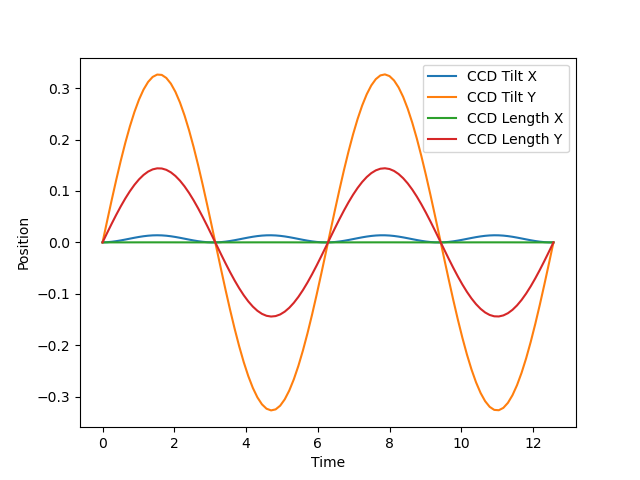

In [15]:

t = np.linspace(0, 4*np.pi, 100)
m_tx_values = np.sin(t)*0.001
m_ty_values = np.sin(t+0.1)
ccd_tran_positions = []
ccd_refl_positions = []

for i in range(len(t)):
    tran_path, refl_path = plot_optical_path(m_tx_values[i], 0, 0, m_ty_values[i]*10)
    
    #print(straight_path, refl_path)
    ccd_tran_positions.append(tran_path)
    ccd_refl_positions.append(refl_path)


ccd_tran_positions = np.array(ccd_tran_positions)
ccd_refl_positions = np.array(ccd_refl_positions)

plt.figure()
plt.plot(t, ccd_tran_positions[:, 0], label='CCD Tilt X')
plt.plot(t, ccd_tran_positions[:, 1], label='CCD Tilt Y')
plt.plot(t, ccd_refl_positions[:, 0], label='CCD Length X')
plt.plot(t, ccd_refl_positions[:, 1], label='CCD Length Y')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


In [19]:
tran_path

([6.637536376482313e-14], [-1.6004396149432409e-16], [453.88618])